<a href="https://colab.research.google.com/github/vasudevan-gomathy/BankCustomer_Churn_Predictor/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Packages**

In [66]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_regression
from matplotlib import pyplot
import joblib

**Importing Data**

In [10]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
df.shape

(10000, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Encoding of Categorical Data**

In [18]:
df = pd.get_dummies(df, drop_first = True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


**Checking for Imbalance**

In [19]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


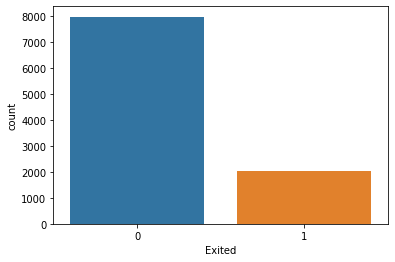

In [20]:
sns.countplot(df['Exited'])

In [21]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

**Handling Imbalanced data with SMOTE**

In [22]:
X_res, y_res = SMOTE().fit_resample(X, y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

**Splitting Dataset into Training and Test**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20)

**Feature Scaling**

In [24]:
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Regression**

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.7762084118016321

In [29]:
precision_score(y_test, y_pred)

0.7855313700384123

In [30]:
recall_score(y_test, y_pred)

0.7644859813084112

In [31]:
f1_score(y_test, y_pred)


0.7748658035996211

**SVC**

In [32]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [33]:
y_pred1 = svm.predict(X_test)


In [34]:
accuracy_score(y_test, y_pred1)


0.837413684871312

In [35]:
precision_score(y_test, y_pred1)

0.8522359040829552

**KNNeighbors Classifier**

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred2 = knn.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred2)

0.8107344632768362

In [40]:
precision_score(y_test, y_pred2)

0.8135168961201502

**Decision Tree Classifier**

In [41]:
dt = DecisionTreeClassifier()


In [42]:
dt.fit(X_train, y_train)
y_pred3 = dt.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred3)

0.7947269303201506

In [44]:
precision_score(y_test, y_pred3)

0.790470372632865

**Random Forest Classifier**

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred4)

0.857187696170747

In [47]:
precision_score(y_test, y_pred4)

0.8671775223499362

**Grdient Boosting Classifier**

In [48]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred5 = gbc.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred5)

0.834902699309479

In [50]:
precision_score(y_test, y_pred5)

0.8523840627041149

In [51]:
report_acc = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'], 
                       'ACC': [accuracy_score(y_test, y_pred),
                               accuracy_score(y_test, y_pred1),
                               accuracy_score(y_test, y_pred2),
                               accuracy_score(y_test, y_pred3),
                               accuracy_score(y_test, y_pred4),
                               accuracy_score(y_test, y_pred5)]})

In [52]:
report_acc

,Models,ACC
0,LR,0.776208
1,SVC,0.837414
2,KNN,0.810734
3,DT,0.794727
4,RF,0.857188
5,GBC,0.834903


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


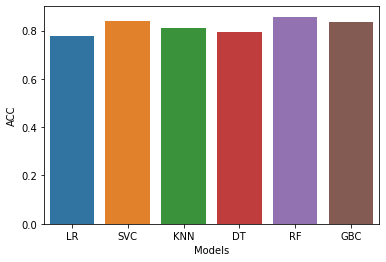

In [53]:
sns.barplot(report_acc['Models'], report_acc['ACC'])

In [69]:
evaluation_report = pd.DataFrame({'Model': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
                                'ACC':[accuracy_score(y_test, y_pred)*100,
                                accuracy_score(y_test, y_pred1)*100,
                                accuracy_score(y_test, y_pred2)*100,
                                accuracy_score(y_test, y_pred3)*100,
                                accuracy_score(y_test, y_pred4)*100,
                                accuracy_score(y_test, y_pred5)*100],
                                'REC':[recall_score(y_test, y_pred)*100,
                                recall_score(y_test, y_pred1)*100,
                                recall_score(y_test, y_pred2)*100,
                                recall_score(y_test, y_pred3)*100,
                                recall_score(y_test, y_pred4)*100,
                                recall_score(y_test, y_pred5)*100],                        
                                'AUC':[roc_auc_score(y_test, y_pred)*100,
                                roc_auc_score(y_test, y_pred1)*100,
                                roc_auc_score(y_test, y_pred2)*100,
                                roc_auc_score(y_test, y_pred3)*100,
                                roc_auc_score(y_test, y_pred4)*100,
                                roc_auc_score(y_test, y_pred5)*100],
                                'F1':[f1_score(y_test, y_pred)*100,
                                f1_score(y_test, y_pred1)*100,
                                f1_score(y_test, y_pred2)*100,
                                f1_score(y_test, y_pred3)*100,
                                f1_score(y_test, y_pred4)*100,
                                f1_score(y_test, y_pred5)*100]})

In [70]:
evaluation_report

,Model,ACC,REC,AUC,F1
0,LR,77.620841,76.448598,77.629739,77.486580
1,SVC,83.741368,81.931464,83.755106,83.545108
2,KNN,81.073446,80.996885,81.074027,81.173899
3,DT,79.472693,80.623053,79.463962,79.827267
4,RF,85.718770,84.610592,85.727181,85.651214
5,GBC,83.490270,81.308411,83.506831,83.227041


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


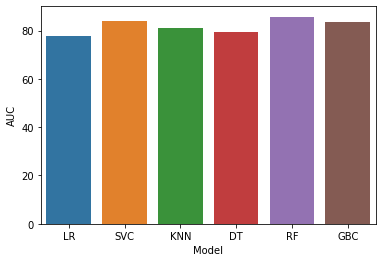

In [71]:
sns.barplot(evaluation_report['Model'], evaluation_report['AUC'])

**Saving the Model**

In [57]:
X_res = sc.fit_transform(X_res)

In [58]:
rf.fit(X_res, y_res)

RandomForestClassifier()

In [59]:
joblib.dump(rf, 'Churn_Predict_Model')

['Churn_Predict_Model']

In [61]:
model = joblib.load('Churn_Predict_Model')

In [62]:
model.predict([[619, 42, 2, 0.0, 0, 0, 0, 101348.88, 0, 0, 0]])

array([1])

**Feature Importance**

Feature: 0, Score: 0.11373
Feature: 1, Score: 0.22623
Feature: 2, Score: 0.07184
Feature: 3, Score: 0.12287
Feature: 4, Score: 0.10215
Feature: 5, Score: 0.01959
Feature: 6, Score: 0.10939
Feature: 7, Score: 0.12372
Feature: 8, Score: 0.01445
Feature: 9, Score: 0.02749
Feature: 10, Score: 0.06854


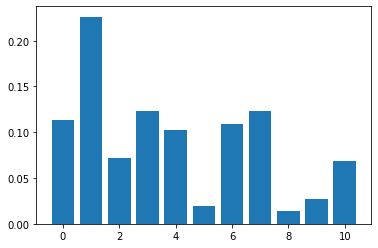

In [72]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()